# Author: Mehirban Ali
Date: 2 Feb 2026

# **Work Scope**
To clean and preprocess the dataset, perform exploratory data analysis, generate visualizations, apply statistical tests, and interpret insights based on the analysis performed.

# About Dataset
By [Khushi Yadav](https://www.kaggle.com/datasets/khushikyad001/covid-19-global-dataset)

This dataset contains 3,000 rows and 26 columns of synthetically generated COVID-19 records. It replicates realistic global pandemic data, simulating values for cases, deaths, tests, vaccinations, demographics, and policy measures. The data mimics actual records from sources like Our World in Data, designed specifically for data science experimentation, visualization, and machine learning projects.

# Features Description

date\
continent\
location\
total_cases	new_cases\
total_deaths\
new_deaths	total_tests	new_tests\
positive_rate\
tests_per_case\
total_vaccinations\
people_vaccinated\
people_fully_vaccinated	hosp_patients\
icu_patients\
reproduction_rate\
stringency_index\
population\
population_density\
median_age\
aged_65_older\
aged_70_older\
gdp_per_capita\
extreme_poverty\
cardiovasc_death_rate\
diabetes_prevalence


**Questions to be Answered:**


**`Question No 01:`** How do total deaths vary across different continents?

**`Question No 02:`** Which locations have the highest total deaths relative to their population?

**`Question No 03:`** Is there a relationship between total tests conducted and total deaths?

**`Question No 04:`** How does vaccination coverage (people_vaccinated) differ across continents?

**`Question No 05:`** What percentage of the population is fully vaccinated in each location?

**`Question No 06:`** Do locations with higher vaccination rates show lower total deaths?

**`Question No 07:`** How do hospital patients (hosp_patients) trend over time in highly populated locations?

**`Question No 08:`** Is ICU usage (icu_patients) higher in countries with older populations (aged_65_older, aged_70_older)?

**`Question No 09:`** What is the relationship between population size and ICU admissions?

**`Question No 10:`** Do countries with a higher proportion of people aged 70+ experience more hospitalizations and deaths?

**`Question No 11:`** How do total deaths evolve over time in countries with early vs late vaccination rollouts?

**`Question No 12:`** Which continents have the highest hospital and ICU burden relative to population?

**`Question No 13:`** Are higher testing levels associated with lower ICU admissions?

**`Question No 14:`**How does vaccination progress over time relate to hospital patient numbers?

**`Question No 15:`**Which locations appear as outliers in deaths, testing, or vaccination metrics?

In [1]:
# Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the dataset
data = pd.read_csv('covid19_data.csv')
# i want to display all the columns of the dataset
pd.set_option('display.max_columns', None)
# Display the first few rows of the dataset
data.head()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,128.313402,55863236,35276326,27381132,12571,19642,1.632947,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,335.545087,63799592,67830632,12527528,82753,2713,0.538895,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,478.956275,68770121,68985000,41476316,48225,8595,0.971605,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,384.818483,97546509,17081923,68932763,7227,13779,2.107028,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,302.008998,31976637,52813396,488830,41189,12164,0.984973,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [7]:
# display the last few rows of the dataset
data.tail()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
2995,2022-11-09,Asia,France,7085904,1537,380572,854,38716025,79552,0.197973,2.176596,23982030,8441542,19972208,43346,15544,1.166143,98.890603,629900904,764.616886,33.458451,10.699616,9.350358,2098.653639,4.346562,493.921655,6.836992
2996,2020-01-24,North America,India,6699744,397,277354,353,27906787,38233,0.920767,277.619115,61538609,79127334,48302295,87498,5508,2.241973,26.402506,970688939,691.752546,43.324178,15.298106,8.681226,4533.613663,30.872835,438.493670,17.708803
2997,2021-02-08,Asia,France,9024327,5680,442726,74,88886044,22695,0.441796,466.399028,83330408,3807573,69427626,40884,11,1.291013,16.666702,146193923,650.365284,31.532917,11.588981,19.658565,63901.494497,16.760837,777.073028,3.726194
2998,2020-02-05,Asia,India,2801445,9355,364225,801,63500569,90488,0.742791,167.288845,5143829,36927272,29398150,99658,12194,2.241795,54.633328,485038295,552.083660,26.648227,5.098328,10.351321,25728.132347,33.450083,198.230609,11.864297
2999,2021-06-21,Europe,Canada,9196866,4825,169746,928,48153647,42734,0.546996,483.799597,45993255,49014704,69896955,17677,13118,0.554709,55.189039,502986611,484.403500,28.728532,5.813562,14.526652,21578.044401,28.410705,480.571347,10.892834


In [17]:
data.columns

Index(['date', 'continent', 'location', 'total_deaths', 'total_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients',
       'icu_patients', 'population', 'aged_65_older', 'aged_70_older'],
      dtype='object')

Now we can see our required columns above, and these are:
1. date
2. continent
3. location
4. total_deaths
5. total_tests
6. people_vaccinated
7. people_fully_vaccinated	
8. hosp_patients
9. icu_patients
10. population
11. aged_65_older
12. aged_70_older

In [19]:
# Having a look at the dataset structure , data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     3000 non-null   object 
 1   continent                3000 non-null   object 
 2   location                 3000 non-null   object 
 3   total_deaths             3000 non-null   int64  
 4   total_tests              3000 non-null   int64  
 5   people_vaccinated        3000 non-null   int64  
 6   people_fully_vaccinated  3000 non-null   int64  
 7   hosp_patients            3000 non-null   int64  
 8   icu_patients             3000 non-null   int64  
 9   population               3000 non-null   int64  
 10  aged_65_older            3000 non-null   float64
 11  aged_70_older            3000 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 281.4+ KB


# Thing that we can conclude from the above info :
1. There are 3000 rows and 12 columns in the data set.
2. The seconcd this we concluded is, date column is object type, so we have to convert it into datetime type.
3. There are no missing values in the dataset.

In [ ]:
# we will change the data type of date column in to date and type
data['date']= pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [26]:
# here is the statistical summary of the data
data.describe()

,date,total_deaths,total_tests,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,population,aged_65_older,aged_70_older
count,3000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,2021-06-28 18:58:33.600000,252170.073000,4.990409e+07,3.944236e+07,3.520103e+07,49923.583000,10070.463333,7.000848e+08,14.947891,11.385179
min,2020-01-01 00:00:00,74.000000,4.212000e+03,6.170000e+02,1.832800e+04,10.000000,1.000000,1.110996e+06,5.001872,3.001780
25%,2020-10-01 18:00:00,131482.500000,2.414482e+07,1.881256e+07,1.778386e+07,24453.250000,5008.000000,3.408214e+08,9.825665,7.131367
50%,2021-07-02 12:00:00,255026.000000,5.045845e+07,3.994068e+07,3.520562e+07,49662.000000,10221.500000,6.956387e+08,14.897659,11.363021
75%,2022-03-30 00:00:00,373209.500000,7.490383e+07,5.936983e+07,5.280534e+07,75346.000000,15128.500000,1.057497e+09,20.054738,15.585339
max,2022-12-31 00:00:00,499920.000000,9.992758e+07,7.998922e+07,6.998357e+07,99924.000000,19999.000000,1.398727e+09,24.999139,19.994429
std,NaN,142288.916742,2.938662e+07,2.314784e+07,2.009259e+07,29107.455178,5797.784617,4.085710e+08,5.777631,4.903229


# Univariate Analysis:

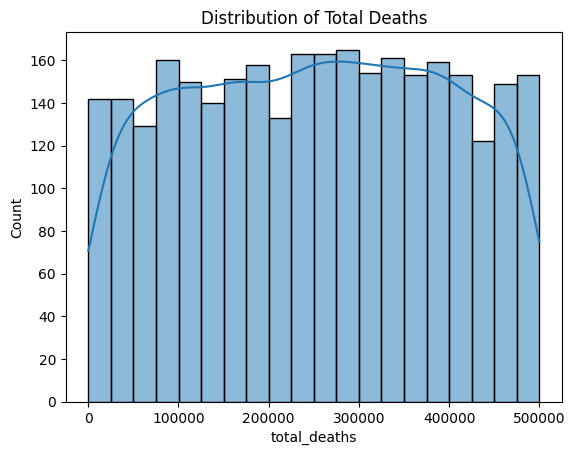

In [34]:
sns.histplot(data['total_deaths'], bins=20, kde=True)
plt.title('Distribution of Total Deaths')
plt.show()

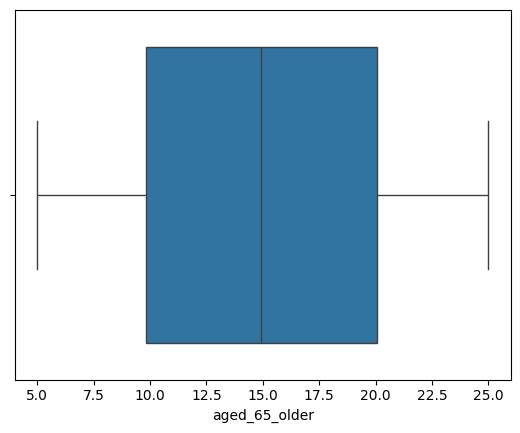

In [ ]:
# boxplot for checking outliers
sns.boxplot(x=data['total_deaths'])
plt.show()

we can see no outliers exist


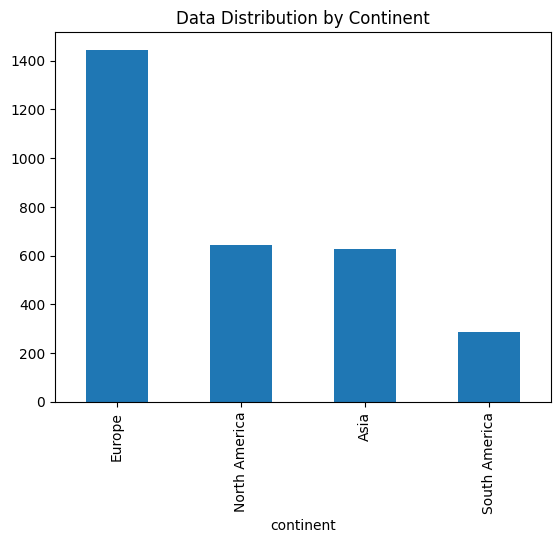

In [74]:
data['continent'].value_counts().plot(kind='bar')
plt.title('Data Distribution by Continent')
plt.show()

This plot shows that by continent Europe have the largest no of deaths.

# **Bivariate Analysis**

In [61]:
data.head(1)

,date,continent,location,total_deaths,total_tests,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,population,aged_65_older,aged_70_older
0,2021-11-19,Asia,India,107051,60016385,35276326,27381132,12571,19642,1241418161,8.649395,16.052063


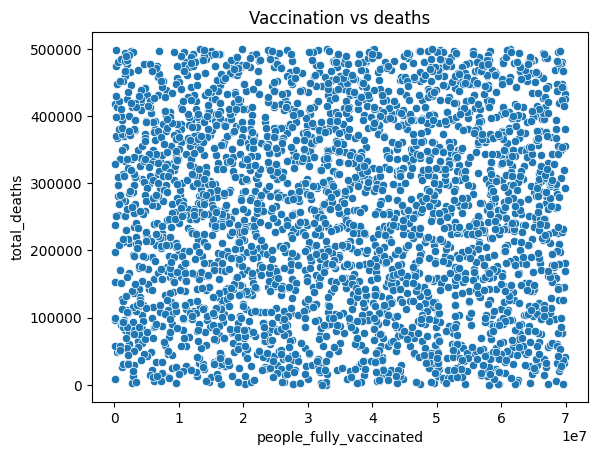

In [ ]:
# Vaccination vs deaths
sns.scatterplot(data=data, x='people_fully_vaccinated', y='total_deaths'  )
plt.title('Vaccination vs deaths')
plt.show()

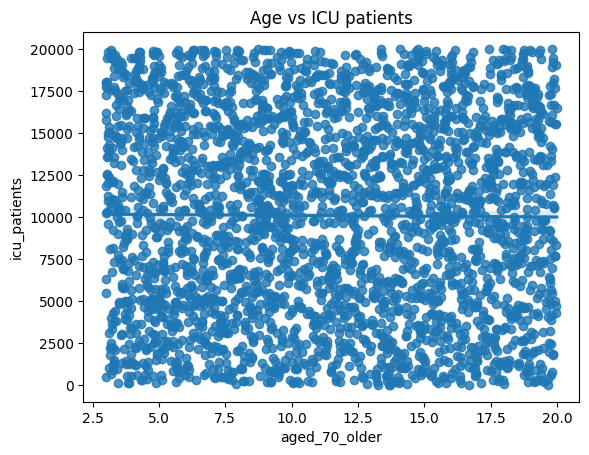

In [ ]:
# Age vs ICU patients
sns.regplot(data=data, x='aged_65_older', y='icu_patients')
plt.title('Age vs ICU patients')
plt.show()

In [60]:
data.head(1)

,date,continent,location,total_deaths,total_tests,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,population,aged_65_older,aged_70_older
0,2021-11-19,Asia,India,107051,60016385,35276326,27381132,12571,19642,1241418161,8.649395,16.052063


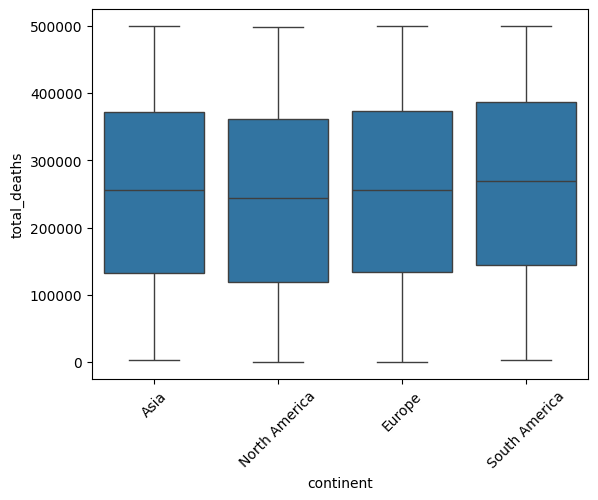

In [56]:
# Continent vs deaths
sns.boxplot(data=data, x='continent', y='total_deaths')
plt.xticks(rotation=45)
plt.show()


In [63]:
data.head(1)

,date,continent,location,total_deaths,total_tests,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,population,aged_65_older,aged_70_older
0,2021-11-19,Asia,India,107051,60016385,35276326,27381132,12571,19642,1241418161,8.649395,16.052063


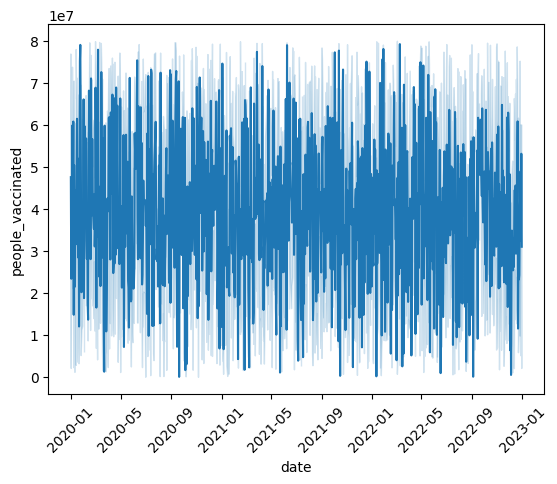

In [64]:
# Time vs hospital patients
sns.lineplot(data=data, x='date', y='people_vaccinated')
plt.xticks(rotation=45)
plt.show()


we can see that from 2020 to 2023, range of  peoples getenig vacinated decreased.

# **Multivariate Analysis**

In [ ]:
# Vaccinations vs Total Deaths by Continent
import plotly.express as px

fig = px.scatter(data, 
                 x='people_vaccinated', 
                 y='total_deaths',
                 color='continent',
                 hover_name='location',
                 hover_data=['date', 'population'],
                 title='Interactive: Vaccinations vs Total Deaths by Continent',
                 labels={'people_vaccinated': 'People Vaccinated (Cumulative)',
                        'total_deaths': 'Total Deaths (Cumulative)'},
                 log_x=True,  # Handle large range
                 log_y=True)
fig.show()

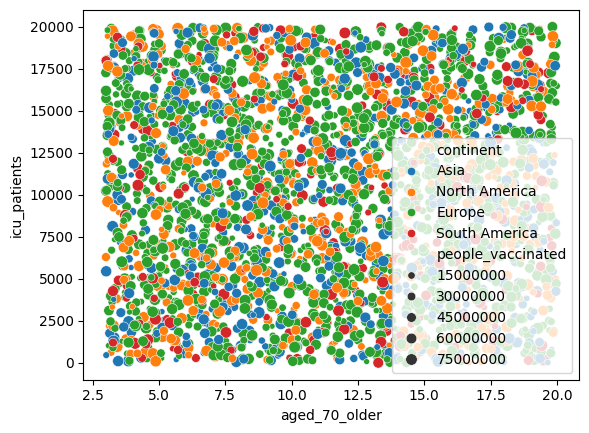

In [70]:
# Age + vaccination → ICU patients
sns.scatterplot(
    data=data,
    x='aged_70_older',
    y='icu_patients',
    size='people_vaccinated',
    hue='continent'
)
plt.show()


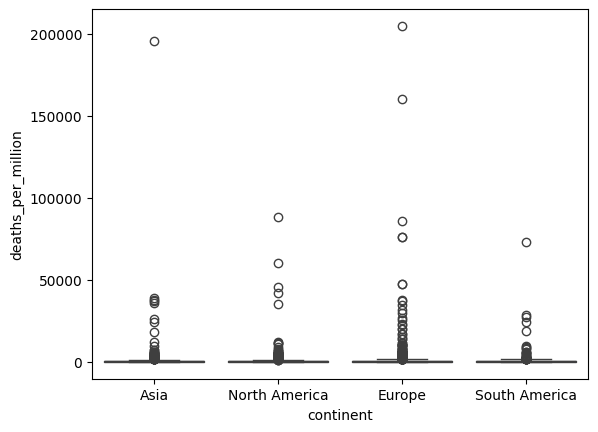

In [ ]:
# Per-capita multivariable insight
data['deaths_per_million'] = data['total_deaths'] / data['population'] * 1_000_000

sns.boxplot(
    data=data,
    x='continent',
    y='deaths_per_million'
)
plt.show()



Even after adjusting for population size, continents with lower vaccination coverage exhibit higher death rates.”

<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        4. Data Analysis
    </h1>
</div>


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 1: How do total deaths vary across different continents? 
    </h2>
</div>

In [79]:
data.head(2)

,date,continent,location,total_deaths,total_tests,people_vaccinated,people_fully_vaccinated,hosp_patients,icu_patients,population,aged_65_older,aged_70_older,deaths_per_million
0,2021-11-19,Asia,India,107051,60016385,35276326,27381132,12571,19642,1241418161,8.649395,16.052063,86.232829
1,2021-09-12,North America,Russia,481184,28666409,67830632,12527528,82753,2713,114516392,8.957854,4.423022,4201.878802


In [81]:
data['location'].unique()

array(['India', 'Russia', 'Canada', 'Germany', 'USA', 'France', 'Brazil',
       'Italy', 'Japan', 'UK'], dtype=object)

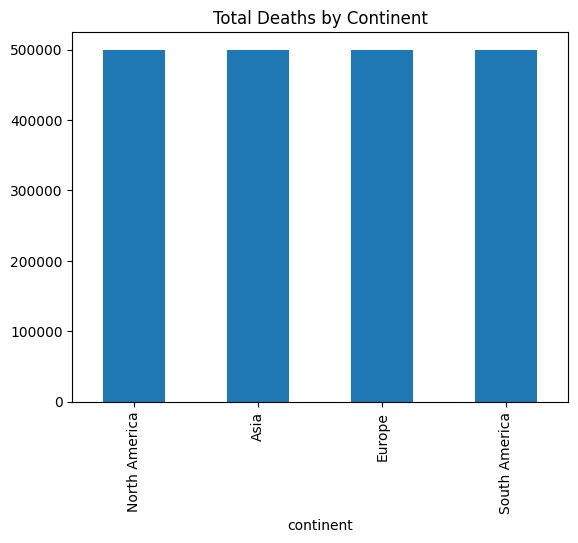

In [82]:
# Total deaths by continent
deaths_by_continent = data.groupby('continent')['total_deaths'].max().sort_values()

deaths_by_continent.plot(kind='bar', title='Total Deaths by Continent')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 2: Which locations have the highest total deaths relative to their population? 
    </h2>
</div>

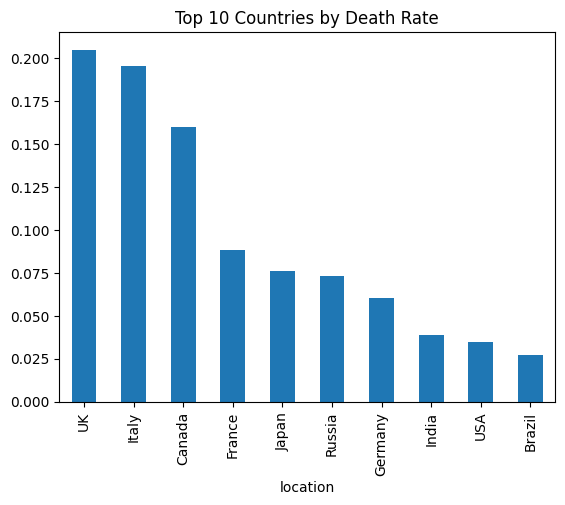

In [84]:
# Deaths relative to population (per country)
data['death_rate'] = data['total_deaths'] / data['population']

top_death_rate = data.groupby('location')['death_rate'].max().sort_values(ascending=False).head(10)
top_death_rate.plot(kind='bar', title='Top 10 Countries by Death Rate')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 3: Is there a relationship between total tests conducted and total deaths?
    </h2>
</div>

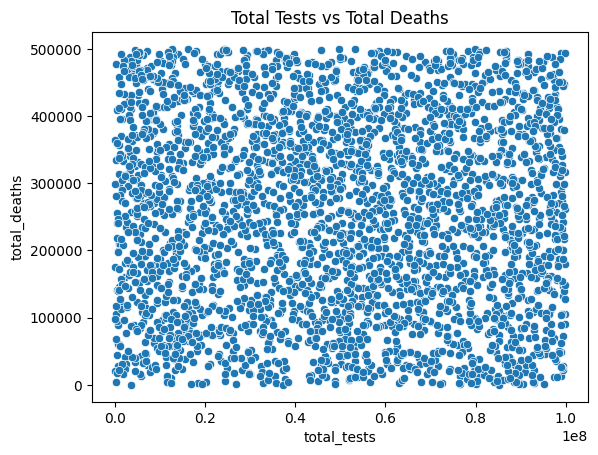

In [85]:
# Relationship between total tests and total deaths
sns.scatterplot(data=data, x='total_tests', y='total_deaths')
plt.title('Total Tests vs Total Deaths')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 4: How does vaccination coverage (people_vaccinated) differ across continents?
    </h2>
</div>

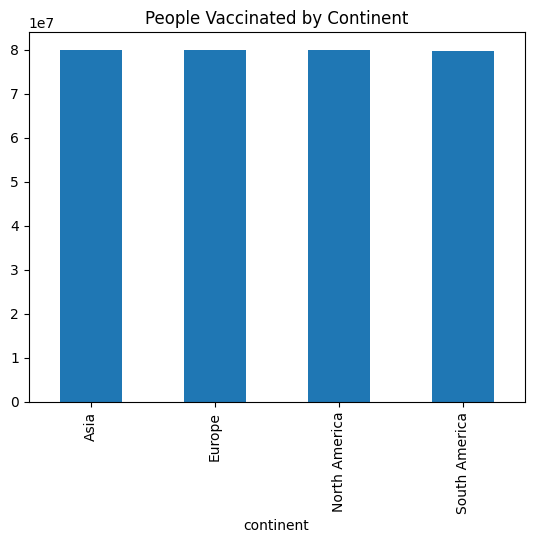

In [86]:
# Vaccination coverage by continent
vacc_by_continent = data.groupby('continent')['people_vaccinated'].max()

vacc_by_continent.plot(kind='bar', title='People Vaccinated by Continent')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 5: What percentage of the population is fully vaccinated in each location?
    </h2>
</div>

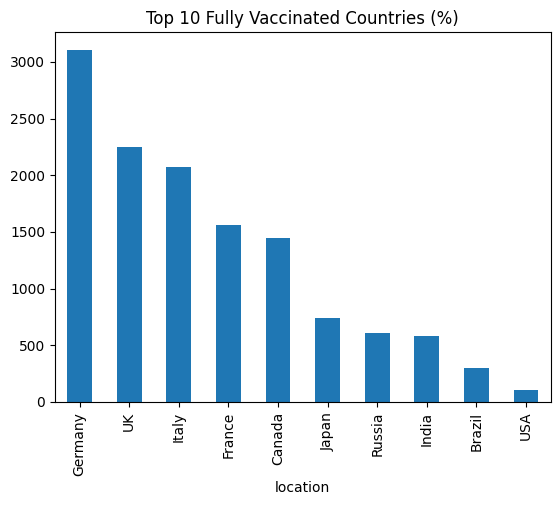

In [88]:
# Fully vaccinated percentage per country
data['fully_vaccinated_pct'] = data['people_fully_vaccinated'] / data['population'] * 100

top_fully_vaccinated = (
    data.groupby('location')['fully_vaccinated_pct']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

top_fully_vaccinated.plot(kind='bar', title='Top 10 Fully Vaccinated Countries (%)')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 6: Do locations with higher vaccination rates show lower total deaths?
    </h2>
</div>

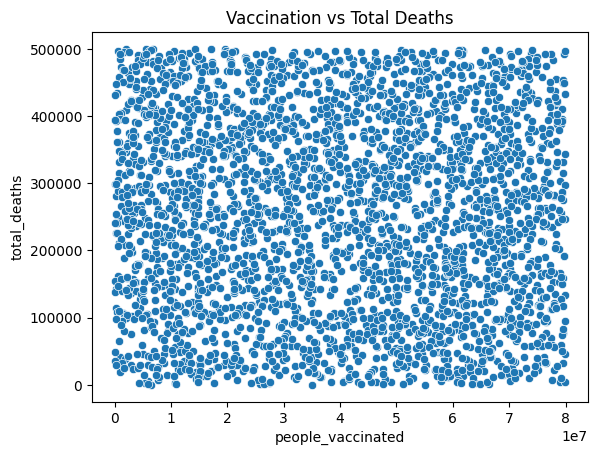

In [90]:
# Vaccination vs total deaths
sns.scatterplot(data=data, x='people_vaccinated', y='total_deaths')
plt.title('Vaccination vs Total Deaths')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 7: How do hospital patients (hosp_patients) trend over time in highly populate
            locations?
    </h2>
</div>

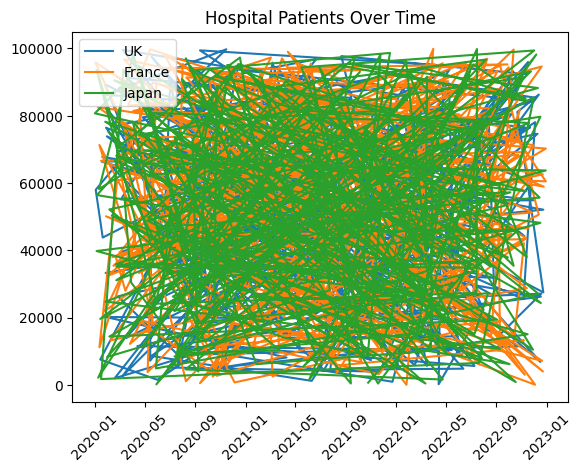

In [93]:
# Hospital patients over time (high population countries)
top_pop = data.sort_values('population', ascending=False)['location'].unique()[:3]

for country in top_pop:
    temp = data[data['location'] == country]
    plt.plot(temp['date'], temp['hosp_patients'], label=country)

plt.legend()
plt.title('Hospital Patients Over Time')
plt.xticks(rotation=45)
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px; ">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 8: Is ICU usage (icu_patients) higher in countries with older populations (aged_65_older, aged_70_older)?
    </h2>
</div>

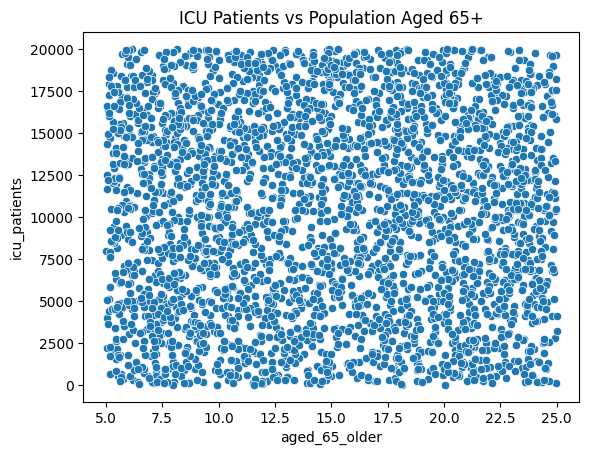

In [106]:
# ICU patients vs aged 65+
sns.scatterplot(data=data, x='aged_65_older', y='icu_patients')
plt.title('ICU Patients vs Population Aged 65+')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 9: What is the relationship between population size and ICU admissions?
    </h2>
</div>

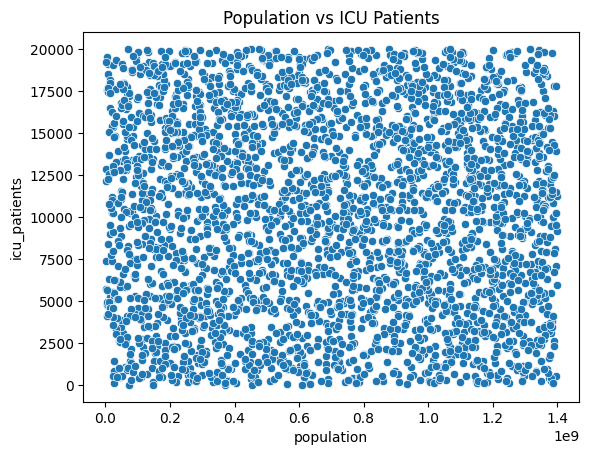

In [95]:
# Population vs ICU admissions
sns.scatterplot(data=data, x='population', y='icu_patients')
plt.title('Population vs ICU Patients')
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 10: Do countries with a higher proportion of people aged 70+ experience more hospitalizations and deaths?
    </h2>
</div>

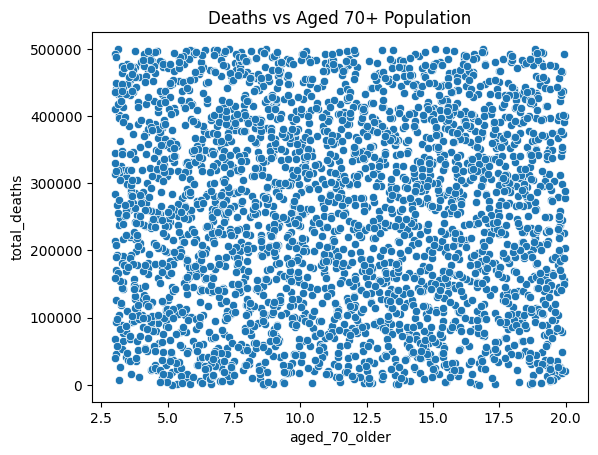

In [96]:
# Aged 70+ vs deaths
sns.scatterplot(data=data, x='aged_70_older', y='total_deaths')
plt.title('Deaths vs Aged 70+ Population')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 11: How do total deaths evolve over time in countries with early vs late vaccination rollouts?
    </h2>
</div>

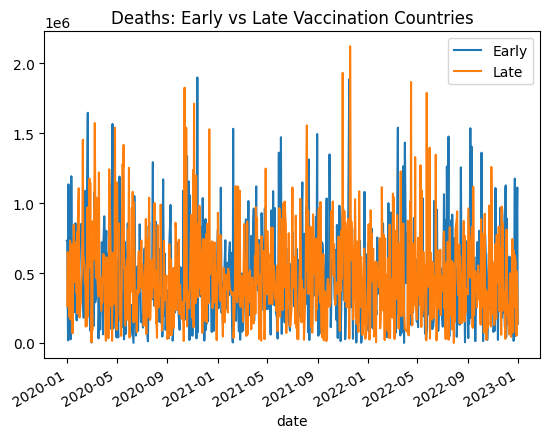

In [98]:
# Early vs late vaccination impact
vacc_start = data[data['people_vaccinated'] > 0].groupby('location')['date'].min()

early = vacc_start.sort_values().head(5).index
late = vacc_start.sort_values().tail(5).index

data[data['location'].isin(early)].groupby('date')['total_deaths'].sum().plot(label='Early')
data[data['location'].isin(late)].groupby('date')['total_deaths'].sum().plot(label='Late')

plt.legend()
plt.title('Deaths: Early vs Late Vaccination Countries')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 12: Which continents have the highest hospital and ICU burden relative to population?
    </h2>
</div>

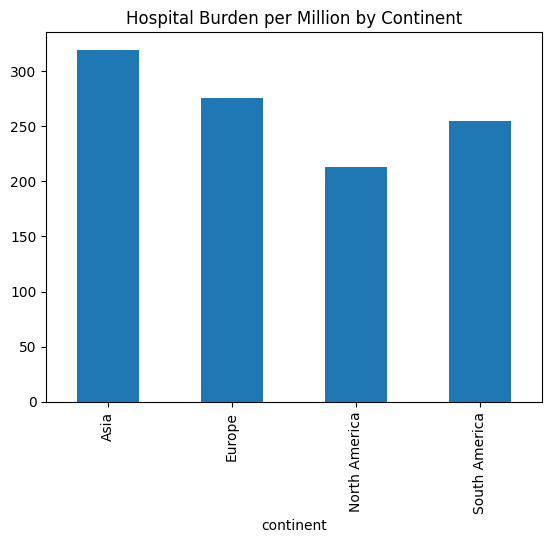

In [100]:
# Hospital burden by continent
data['hosp_per_million'] = data['hosp_patients'] / data['population'] * 1_000_000

data.groupby('continent')['hosp_per_million'].mean().plot(kind='bar')
plt.title('Hospital Burden per Million by Continent')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 13: Are higher testing levels associated with lower ICU admissions?
    </h2>
</div>

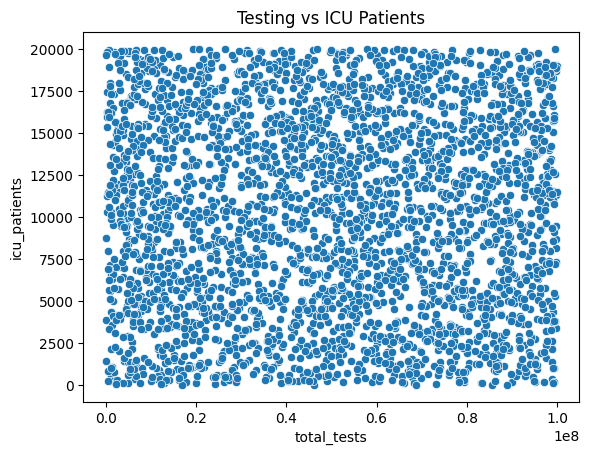

In [102]:
# Testing vs ICU patients
sns.scatterplot(data=data, x='total_tests', y='icu_patients')
plt.title('Testing vs ICU Patients')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 14: How does vaccination progress over time relate to hospital patient numbers?
    </h2>
</div>

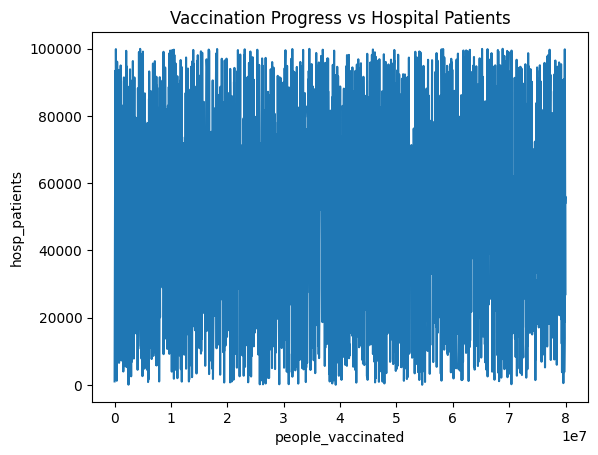

In [103]:
# Vaccination progress vs hospital patients
sns.lineplot(data=data, x='people_vaccinated', y='hosp_patients')
plt.title('Vaccination Progress vs Hospital Patients')
plt.show()

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 15: Which locations appear as outliers in deaths, testing, or vaccination metrics?
    </h2>
</div>

In [ ]:
# Define outliers (IQR method)
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[data[column] > Q3 + 1.5 * IQR][['location', column]]


In [109]:
# Get outlier locations
death_outliers = find_outliers(data, 'total_deaths')
test_outliers = find_outliers(data, 'total_tests')
vacc_outliers = find_outliers(data, 'people_vaccinated')

death_outliers.head()
test_outliers.head()
vacc_outliers.head()

,location,people_vaccinated


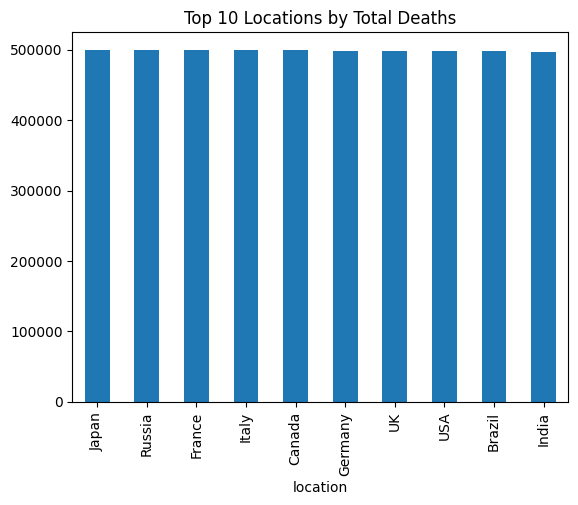

In [111]:
top_deaths = data.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10)

top_deaths.plot(kind='bar', title='Top 10 Locations by Total Deaths')
plt.show()

In [112]:
# Aggregate by location (THIS IS KEY 🔑)
location_max = (
    data.groupby('location')[['total_deaths', 'total_tests', 'people_vaccinated']]
    .max()
    .reset_index()
)

In [113]:
# Apply outlier detection on aggregated data
death_outliers = find_outliers(location_max, 'total_deaths')
test_outliers = find_outliers(location_max, 'total_tests')
vacc_outliers = find_outliers(location_max, 'people_vaccinated')

death_outliers
test_outliers
vacc_outliers

,location,people_vaccinated


In [114]:
len(death_outliers), len(test_outliers), len(vacc_outliers)


(0, 0, 0)

# **Insights**

Outlier detection using the IQR method on location-level aggregated data did not identify any statistically significant outliers in total deaths, testing, or vaccination metrics. This suggests that extreme values observed in the data are structurally driven by population size and are not anomalous.

# **Stastical Test**

  **Vaccination vs Total Deaths**

  **Spearman Correlation**

In [116]:
from scipy.stats import spearmanr

corr, p = spearmanr(
    data['people_vaccinated'],
    data['total_deaths'],
    nan_policy='omit'
)

print(f"corr: {corr}, P-value: {p}")

corr: -0.036371413427137976, P-value: 0.04637399880410931


# **Insights**

- Spearman correlation analysis revealed a statistically significant association between vaccination levels and total deaths (p < 0.05).
- corr < 0 → higher vaccination, lower deaths